<a href="https://colab.research.google.com/github/scudilio/Churn_model/blob/master/Parte_III_Churn_artigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARTE III: Como utilizar modelos de Machine Learning para reduzir o Churn**


Como comentado no nosso último artigo, o Churn é um indicativo de gestão da empresa e controlá-lo se faz necessário para evitar problemas futuros. 

Uma das maneiras que podemos diminuir o Churn é prever quais clientes têm mais risco de cancelar serviço. Assim conseguimos tomar medidas afim de evitar o Churn.

 
Modelos de Machine Learning são técnicas poderosa para esse fim, ao utilizar essa ferramenta, você poderá descobrir com facilidade aqueles clientes que têm um risco maior de Churn.

Nesse artigo iremos continuar a análise do conjunto de dados de uma agência bancária, apresentado no último artigo, e iremos mostrar o passo a passo da implementação de modelos de Churn. Para alcançar esse objetivo seguiremos as seguintes etapas.

1.   Entedimento do Problema
2.   Obtenção dos dados
3.   Análise Exploratória dos dados
4.   Pré-processamento
5.   Modelos de Machine Learning
6.   Avaliação do modelo 

O entendimento do problema de Churn foi abordado na primeira parte dessa série de artigos. No parte II, dessa série, aprensentamos os dados e visualizamos os dados, afim de identificar o perfil dos clientes que cancelaram o contrato com a agência bancária. 

Se você não leu os outros artigos, corre lá para ver, eles são sequenciais e vão auxiliar no entendimento desse tutorial.



# **Recordando**

Os dados utilizados aqui foram extraídos do Kaggle e são dados de clientes de uma agência bancária. Utilizaremos o Google Colab para fazer as análises.

**Permitindo o acesso do Google Colab ao Drive**

Para importar os dados, que estão salvo no Google Drive, é necessário permitir o acesso do Colab. Para isso precisamos rodar os comandos abaixo e clicar na URL que irá aparecer, permitir o acesso ao drive e copiar e colar o código de acesso no Colab. 

In [1]:
#Acesso ao drive
from google.colab import drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Importando os dados**

Importando a biblioteca pandas para processar os dados.

In [0]:
import pandas as pd

In [6]:
##IMPORTANDO ARQUIVOS
#escrevendo em um arquivo csv
df= pd.read_csv('/content/drive/My Drive/kaggle_datasets/Churn_Modelling.csv')
df.head(10) #visualizando as 10 primeiras linhas do dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


No conjunto de dados temos as seguinte variáveis:

* CustomerId: identificação do cliente;
* Surname: sobrenome do clientes;
* CreditScore: pontuação de credito, 0 alto risco de inadimplência e 1000 clientes com baixo risco de inadimplência;
* Geography: país que o serviço é oferecido;
* Gender: sexo do cliente;
* Age: idade do cleinte;
* Tenure: um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade. 
* Balance: saldo da conta corrente;
* NumOfProducts: número de produtos bancários adquiridos;
* HasCrCard: se tem cartão de credito ou não, (Sim = 1 e Não = 0);
* IsActiveMember: se é um cliente com conta ativa, (Ativo = 1) ;
* EstimatedSalary: salário estimado;
* Exited: cliente deixou de ser cliente do banco ou não (Churn = 1).


No artigo anterior concluimos que clientes da Alemanha, do sexo feminino, que não são membro ativo, com alto número de produtos, score de crédito baixo, com saldo bancário elevado e com idade entre 50 e 60 anos têm uma taxa de Churn maior que os outros clientes.

Assim, clientes com essas características possui um risco maior de cancelarem o serviço bancário.

Nesse artigo iremos implementar um modelo de Churn para prever os clientes com um alto risco de Churn.



# **4. Pré-Processamento dos dados**

Nessa seção precisamos transformar as variáveis para utilizá-las nos modelos de Machine Learning. Teremos as seguintes etapas

* Eliminar as variáveis que não serão utilizadas;
* Identificação de dados missing
* Separando as variáveis
* Processamento variáveis categóricas;
* Processamento variáveis numéricas;

##**A. Eliminar as variáveis que não serão utilizadas**

Em conjunto de dados reais é comum existir variáveis que não tem utilidade prática, por exemplo, as variáveis 'RowNumber' (número da linha) e 'CustomerId'(ID do Cliente) não trazem informações relevantes para enteder o Churn de clientes. 
Assim iremos eliminar essas variáveis utilizando a função drop().

In [7]:
df1 = df.drop(columns = ['RowNumber','CustomerId','Surname'])
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


##**B. Identificando dados faltantes**

Nada é perfeito nesse mundo e na análise de dados isso também é verdade. Dados faltantes ou dados missing são comuns em dados reais, isso se deve a 'n' motivos, ou a pessoa que fez o cadastro esqueceu de preencher essa informação, ou a dona da conta não tinha essa informação quando fez o cadastro, entre outros motivos.

Por exemplo, nem todos tem o nome do pai na certidão de nascimento.

Assim para identificar a presença de dados faltantes no conjunto de dados, utilizamos os comandos a seguir

In [0]:
#Contato número de observações faltantes no dataset para cada variável
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Observamos que nenhuma variável em estudo apresenta dados faltantes, dados missing. Assim, não teremos o processo de tratamento dos dados faltantes. 

##**C. Separando as variáveis**

No modelos de Machine Learning temos a variável dependente (variável resposta) que queremos prever, no nosso caso é a variável 'Exited'. E as covariáveis (variáveis independentes) que são as variáveis que irá explicar o Churn. 

Para não modificar a variável resposta (target) durante o pré-processamento, iremos separá-la das outras variáveis do dataset.


In [8]:
#Criando variaveis independentes e dependentes

y = df1['Exited']
X = df1
X = df1.drop('Exited',axis = 1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


###**Separando as variáveis numéricas da categóricas**

Variáveis numéricas são aquelas variáveis que assumem valores numéricos, por exemplo a variável idade. As variáveis numéricas são classificadas como variaveis contínuas ou discreta. 

As variáveis contínuas assumem valores na reta real, como a variável Salário Estimado. E as variáveis discretas são aquelas que assumem valores inteiros, como a variável número de produtos.

Variáveis categóricas são variáveis que não assumem valores numéricos. Por exemplo, a variável país. 

As variáveis categóricas são classificadas como nominais e ordinanais. As variáveis categóricas nominais são aquelas que não tem nenhuma ordem envolvida, por exemplo, a variável sexo e ordinais quando temos uma ordem envolvida, como a variável grau de escolaridade. 

No pré processamento dos dados separamos as variáveis entre categóricas e numéricas, pois para cada tipo de variável utilizamos técnicas de processamento diferentes.



In [9]:
#Variáveis Continuas
x_cont=['Tenure','CreditScore','Balance','Age','EstimatedSalary']
x_cont

['Tenure', 'CreditScore', 'Balance', 'Age', 'EstimatedSalary']

In [10]:
#Variáveis Categóricas
x_cat = list(set(X)-set(x_cont))
x_cat
x_dummies=X[x_cat]
x_dummies

,NumOfProducts,Gender,HasCrCard,IsActiveMember,Geography
0,1,Female,1,1,France
1,1,Female,0,1,Spain
2,3,Female,1,0,France
3,2,Female,0,0,France
4,1,Female,1,1,Spain
...,...,...,...,...,...
9995,2,Male,1,0,France
9996,1,Male,1,1,France
9997,1,Female,0,1,France
9998,2,Male,1,0,Germany




##**D.Processamento das variáveis categóricas**

Alguns algoritmos de machine learning não aceitam variáveis categóricas e por isso precisamos utilizar técnicas para converter as classes em números.

Ou seja, convertemos as colunas categóricas em numéricas simplesmente atribuindo números inteiros a classes distintas. 

Para as variáveis categóricas com apenas duas classes utilizaremos a função Label Encoder para converte colunas categóricas em numéricas simplesmente atribuindo números inteiros a valores distintos.

 Por exemplo, a coluna sexo tem dois valores: Feminino e Masculino . Após aplicar a função, os valores serão transformados em 1 e 0.

In [11]:
##Substituindo a variável sexo para 0 e 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender']) 
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71
6,822,France,1,50,7,0.00,2,1,1,10062.80
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88
8,501,France,1,44,4,142051.07,2,0,1,74940.50
9,684,France,1,27,2,134603.88,1,1,1,71725.73


Para as variáveis categóricas com mais categorias, utilizaremos o método get_dummies(). Esse método transforma uma variável em variável dummy, ou seja, ele cria novas colunas de variáveis transformando a variável em binária, ou seja, atribui 0 e 1s.

Por exemplo, a variável país possuí três categorias, França, Espanha e Alemanha. A função get_dummies() transforma cada categoria em uma nova variável binária, ou seja, 
* Variável França: se o cliente for da França 1 e 0 caso contrário.
* Variável Alemanha: se o cliente for da Alemanha 1 e 0 caso contrário.
* Variável Espanha; se o cliente for da Espanha 1 e 0 caso contrário.

Observe o conjunto de dados após aplicar a função get_dummies().


In [12]:
x_final = pd.get_dummies (data = X, columns=['Geography','NumOfProducts'] )
x_final

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,2,0.00,1,1,101348.88,1,0,0,1,0,0,0
1,608,0,41,1,83807.86,0,1,112542.58,0,0,1,1,0,0,0
2,502,0,42,8,159660.80,1,0,113931.57,1,0,0,0,0,1,0
3,699,0,39,1,0.00,0,0,93826.63,1,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,79084.10,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,1,0,96270.64,1,0,0,0,1,0,0
9996,516,1,35,10,57369.61,1,1,101699.77,1,0,0,1,0,0,0
9997,709,0,36,7,0.00,0,1,42085.58,1,0,0,1,0,0,0
9998,772,1,42,3,75075.31,1,0,92888.52,0,1,0,0,1,0,0


Observe que a variável país agora tem 3 colunas, para cada país temos uma coluna com valores 0 ou 1. Onde 1, significa que pertence aquele país.

##**E. Variáveis Contínuas**

Observe que as variáveis numéricas Balance, Estimated Salary, Age e Credit Score estão em diferentes escalas e isso pode causar problemas no treinamento dos modelos de machine learning.


Para resolver esse problemas utilizaremos o método MiniMax para padronizar as variáveis contínuas, ou seja, vamos deixar todas as variáveis contínuas numa escala entre 0 e 1.


O método MiniMax é definido como 

valor_padronizado = ( valor — Coluna.min) / (Coluna.max — Coluna.min)

Aqui utilizaremos uma função MinMaxScaler() do pacote sklearn.


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_final[x_cont] = scaler.fit_transform(x_final[x_cont])
x_final[x_cont]

,Tenure,CreditScore,Balance,Age,EstimatedSalary
0,0.2,0.538,0.000000,0.324324,0.506735
1,0.1,0.516,0.334031,0.310811,0.562709
2,0.8,0.304,0.636357,0.324324,0.569654
3,0.1,0.698,0.000000,0.283784,0.469120
4,0.2,1.000,0.500246,0.337838,0.395400
...,...,...,...,...,...
9995,0.5,0.842,0.000000,0.283784,0.481341
9996,1.0,0.332,0.228657,0.229730,0.508490
9997,0.7,0.718,0.000000,0.243243,0.210390
9998,0.3,0.844,0.299226,0.324324,0.464429


# **5.Modelo de Churn**

Após o pré processamento, o conjunto de dados está pronto para a modelagem.
Prever o Churn de clientes é um problema de classificação binária, 1 se Churn e 0 caso contrário.


 Para prever os clientes em risco de Churn iremos utilizar o modelo KNN, Random Forest e XGBost. Lembre-se a variável resposta Exited tem apenas 20% de valores 1. E por isso escolhemos modelos que não sofrem tanta influência dos dados desbalanceado.

#**Validação Hold-Out**

Para analisar a capacidade de generalização do modelo é importante separar o dataset em conjunto de dados de treino e dados de teste. O conjunto de dados de treino utilizamos para treinar o modelo e utilizaremos 75% dos conjunto de dados para isso.

O conjunto de dados de teste utilizamos para analisar o quanto o modelo está acertando para prever as classes, 1 para Churn e 0 caso contrário. Essa etapa é necessária, para analisar como nosso modelo se comporta em dados desconhecidos.

A figura, a seguir, exemplifica o método holdout, onde temos os dados e dividimos em duas partes, uma para treinar o modelo e outra para testar o modelo em dados desconhecidos.


In [0]:
from google.colab import files
from IPython.display import Image
uploaded=files.upload()

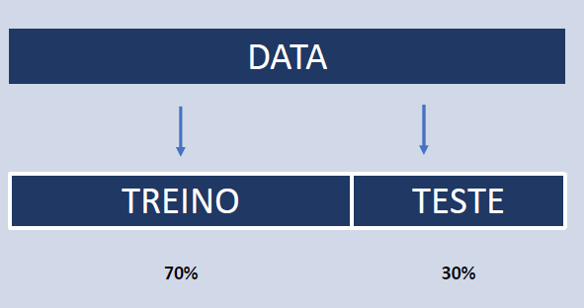

In [0]:
Image('holdout.png')

In [14]:
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 

x_treino, x_teste, y_treino,y_teste  = train_test_split(x_final, y, test_size = 0.25,random_state = 1)
x_treino

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
651,0.740,1,0.459459,0.7,0.000000,1,1,0.073855,1,0,0,1,0,0,0
6560,0.454,0,0.189189,0.1,0.000000,1,0,0.049459,1,0,0,0,1,0,0
8974,0.712,0,0.337838,0.1,0.000000,1,0,0.159771,0,0,1,0,1,0,0
2348,0.948,1,0.364865,0.3,0.514988,0,0,0.300730,1,0,0,1,0,0,0
5670,0.294,1,0.189189,0.8,0.000000,1,0,0.336796,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.542,1,0.391892,0.7,0.427916,1,1,0.333970,0,1,0,1,0,0,0
7813,0.668,0,0.608108,0.3,0.323820,1,0,0.348192,0,1,0,1,0,0,0
905,0.644,0,0.364865,0.9,0.000000,1,1,0.460124,1,0,0,1,0,0,0
5192,0.626,0,0.283784,0.8,0.000000,1,1,0.505835,1,0,0,0,1,0,0


##**Modelo KNN** 

Modelo mais simples de aprendizado supervisiona, mas nem por isso ele perde em relação ao seu desempenho. 

KNN ou k-vizinhos mais próximo utiliza como base para prever as classes, os vizinhos mais próximo, ou seja, as observações mais próximas serão a base para prever essa nova observação.

Para facilitar o entendimento, ilustramos o método através de um exemplo, figura a seguir. O interesse é prever se o círculo verde é um triângulo vermelho ou um quadrado azul.

Primeiro, escolhemos o número de k vizinhos, k precisa ser um número inteiro e impar. Depois medimos a distância da nova observação (círculo verde) com os pontos do dataset (triângulos e quadrados).  

Para finalizar, ordenamos as distâncias e escolhemos os k pontos mais próximos, se a maioria dos pontos mais próximos forem da categoria triãngulo vermelho, o ponto verde será classificado como triângulo, caso contrário será quadrado.

Observe que o método é bem influenciado pela escolha do K. Se escolhemos k=3, o círculo será classificado como triângulo vermelho. Se K=5, o círculo será classificado como quadrado azul.

Além disso, o algoritmo KNN, diferente dos outros algoritmos, tem seu poder computacional utilizado na amostra teste, quando precisamos prever uma nova observação e não para ajustar o modelo. Visto que as distâncias entre as observações só será calculada, quando incluímos uma nova observação.

In [0]:
from google.colab import files
from IPython.display import Image
uploaded=files.upload()

Saving 800px-KnnClassification.svg.png to 800px-KnnClassification.svg.png


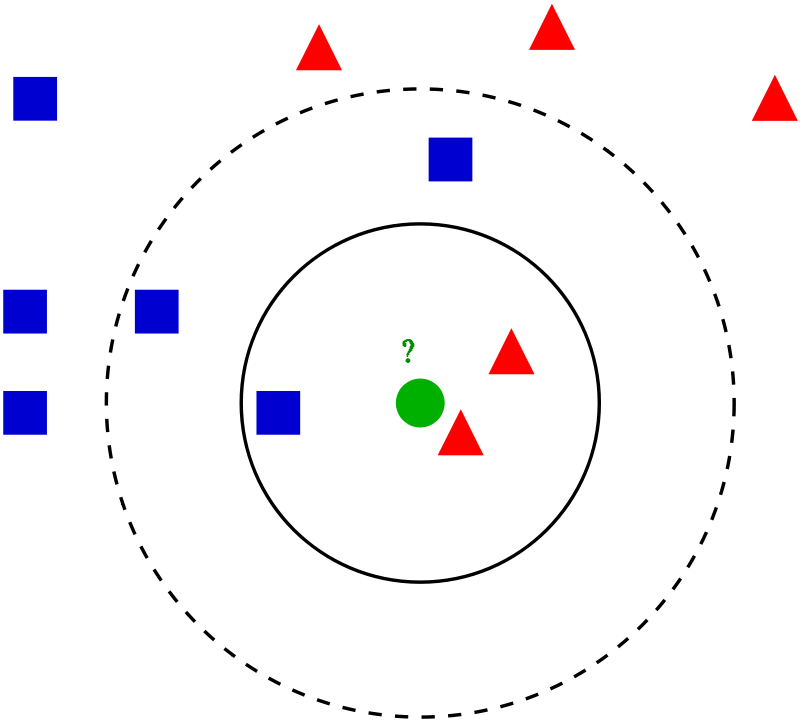

In [0]:
Image('800px-KnnClassification.svg.png',width=300)

Para ajustar o modelo precisamos roda apenas as duas linha de código a seguir.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(x_treino, y_treino)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

* **Previsão na amostra teste e matriz de confusão**

In [16]:
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))


Predito     0    1   All
Real                    
0        1920   60  1980
1         379  141   520
All      2299  201  2500


Observe que apesar de estar classificando bem os clientes que não deram Churn, classe 0, temos muitos falsos negativos no modelo (quando o modelo preve 0, mas o correto era 1). Ou seja, o modelo não consegue prever bem o Churn, que era o objetivo principal na análise.

Vamos tentar o modelo Random Forest para buscar um resultado melhor.

##**Modelo Random Forest**



In [0]:
# Importe o modelo que estamos usando 
from sklearn.ensemble import RandomForestClassifier
# Instancie o modelo com 1000 árvores de decisão 
rf = RandomForestClassifier (n_estimators = 1000, random_state = 42) 
# Treine o modelo nos dados de treinamento 
rf.fit (x_treino, y_treino);


In [18]:
y_rf = rf.predict(x_teste)
print (pd.crosstab(y_teste,y_rf, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1914   66  1980
1         266  254   520
All      2180  320  2500


O modelo de Random Forest conseguiu melhores resultados, porém ainda temos bastante falsos negativos. Vamos tentar um modelo mais robusto e que não sofre tanta influência em amostras desbalanceada.

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, y_rf))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1980
           1       0.79      0.49      0.60       520

    accuracy                           0.87      2500
   macro avg       0.84      0.73      0.76      2500
weighted avg       0.86      0.87      0.85      2500



In [0]:
#Analisando a importância de cada variável
rf.feature_importances_

feature_importances = pd.DataFrame(rf.feature_importances_, index = x_treino.columns, columns=['importance']).sort_values('importance',ascending=False)

#**Como o modelo XGBoost funciona**
O modelo XGBoost, vem do eXtreme Gradient Boosting, é uma categoria de modelos baseada nos algoritmos de árvores de decisão em combinação com os algoritmos de Gradient Boosting (gradiente aumentado). Além de ser um modelo robusto que não sofre tanta influência com dados desbalanceado.

Os modelos padrões em aprendizado supervisionado, como a Árvore de Decisão, simplesmente treina um único modelo nos dados de treinamento. Mesmo quando utilizamos o método Ensemble para combinar os modelos, estamos ajustando os modelos e fazendo previsões individualmente.

Os algoritmos de Boosting, mesmo sendo uma técnica de Ensemble, pois combina muitos modelos, utiliza um método mais inteligente. Onde os novos modelos adicionados tem o objetivo de corrigir os erros dos modelos anteriores. 
O algoritmo para quando não existe mais melhorias a ser feita.  

Os algoritmos de Gradient Boosting são treinados para prever os resíduos dos modelos anteriores e tentar reduzir o mesmo, ou seja, utiliza o algoritmo *Gradient Descent* para minimizar os erros dos modelos anteriores.

Para ajustar o algoritmo XGBoost utilizamos a biblioteca xgboost. Não se assuste com a função do XGBClassifier( ). O modelo XGBoost tem muitos parâmetros e posteriormente faremos um artigo para explicar esses parâmetros.

No momento o que você precisa entender é a função, os parâmetros podem ser omitidos e o algoritmo utilizará os parâmetros default.

Porém após fazer alguns testes, os parâmetros apresentados a seguir, foram o que retornaram os melhores resultados.

In [20]:
#Construindo o modelo
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# ajuste do modelo nos dados de treino
xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1.0,
 seed=27)
xgb.fit(x_treino, y_treino)
 


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.0, seed=27,
              silent=None, subsample=0.8, verbosity=1)

**Validação do modelo nos dados de teste**

In [21]:

#fazendo as predições no dados de teste
preditos_xgb = xgb.predict(x_teste)
print (pd.crosstab(y_teste,preditos_xgb, rownames=['Real'], colnames=['Predito'], margins=True))


Predito     0    1   All
Real                    
0        1890   90  1980
1         255  265   520
All      2145  355  2500


In [0]:
#Avaliando a perfomance do modelo

accuracy = accuracy_score(y_teste, preditos_xgb)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 86.20%


Usando este modelo simples, alcançamos uma precisão de 86%. Apesar do Random Forest 87%, escolhemso o XGBoost como o melho modelo. Pois o XGBoost foi o modelo que conseguiu prever melhor o Churn.

A seguir calculamos outras medidas para avaliar a performance do modelo.


In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, preditos_xgb))


              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1980
           1       0.75      0.51      0.61       520

    accuracy                           0.86      2500
   macro avg       0.81      0.73      0.76      2500
weighted avg       0.85      0.86      0.85      2500



Observe que apesar da acurácia ser menor no XGBoost, todas as medidas referentes a classe 1 foi melhor no XGBoost. Lembre-se, a acurácia é uma medida geral do acerto do modelo, e o modelo XGBoost não conseguiu prever a classe 0 tão bem quanto o modelo Random Forest, por isso a acurácia foi menor.

Porém como o nosso objetivo era prever o Churn, o modelo XGBoost teve uma melhor performance nesse quesito.

**Analisando a importância das variáveis**

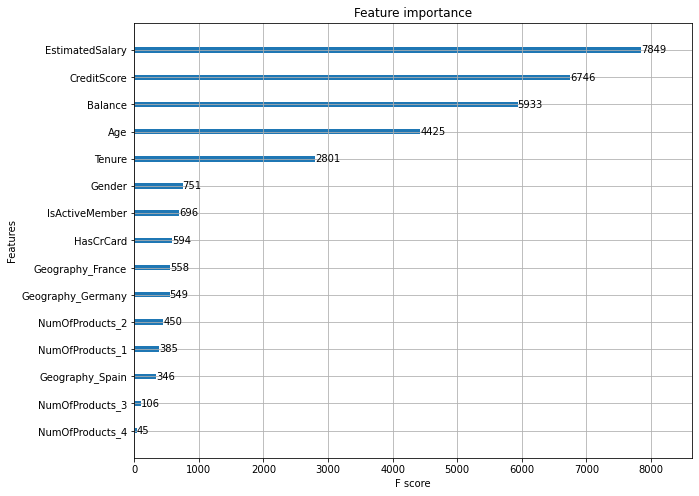

In [24]:
#Analisando a importância de cada variável
import matplotlib.pyplot as plt
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb, ax=ax)

As variáveis mais importante para prever o Churn dos clientes foram: idade, saldo bancário, número de produtos, pontuação de crédito, estimativa de salário, membro ativo e país Alemanha.

##**Métodos Ensemble**

Para tentar melhorar a previsão do Churn, vamos combinar os dois melhores modelos, Random Forest e XGBoost.



In [0]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier with soft voting 
voto = VotingClassifier(estimators=[('rf', rf),('xgb',xgb)], voting='soft')
voto = voto.fit(x_treino,y_treino)


In [0]:
y_predito = voto.predict(x_teste)
print (pd.crosstab(y_teste,y_predito, rownames=['Real'], colnames=['Predito'], margins=True))


Predito     0    1   All
Real                    
0        1908   72  1980
1         263  257   520
All      2171  329  2500


In [0]:
print(classification_report(y_teste, y_predito))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1980
           1       0.78      0.49      0.61       520

    accuracy                           0.87      2500
   macro avg       0.83      0.73      0.76      2500
weighted avg       0.86      0.87      0.85      2500



Ao combinar os modelos observamos uma melhora nas medidas de validação, assim vamos considerar os modelos combinados como o nosso melhor modelo.

**Probabilidade de Churn**

Finalmente, a melhor maneira de usar esse modelo é atribuir probabilidade de Churn para cada cliente, criar segmentos e criar estratégias sobre isso. Para obter a probabilidade de Churn do nosso modelo, utilize o bloco de código abaixo:

In [32]:

df['proba'] = voto.predict_proba(x_final[x_treino.columns])[:,1]
df[['CustomerId','proba']]

,CustomerId,proba
0,15634602,0.741144
1,15647311,0.062000
2,15619304,0.983270
3,15701354,0.033265
4,15737888,0.024809
...,...,...
9995,15606229,0.001746
9996,15569892,0.014231
9997,15584532,0.724213
9998,15682355,0.060355


Agora temos a probabilidade do cliente dar Churn e podemos criar ações com base nisso. 

#**CONCLUSÃO PARTE II: Modelo de Churn**

O modelo XGBost e Random Forest se mostraram eficiente para prever a probabilidade do Churn dos clientes. As variáveis mais importante para prever o Churn foram a idade do cliente, o saldo bancário e o número de produtos, ou seja, quanto maior o produto maior o risco de Chun.

O modelo final, foi a combinação dos modelos XGBoost e Random Forest. 
Com modelo de Churn podemos prever clientes com a maior chance de cancelar o serviço e assim tomar medidas preventivas, afim de evitar essa saída.

Podemos melhorar a predição desse modelo categorizando as variáveis contínuas e balanceando as amostras, mas isso é assunto para um próximo artigo.


Ficou com alguma dúvida? Deixe suas dúvidas ou opnião nos comentários.